In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = np.linspace(0, 50, 501) # linspace 0 to 50 with 501 points
y = np.sin(x)

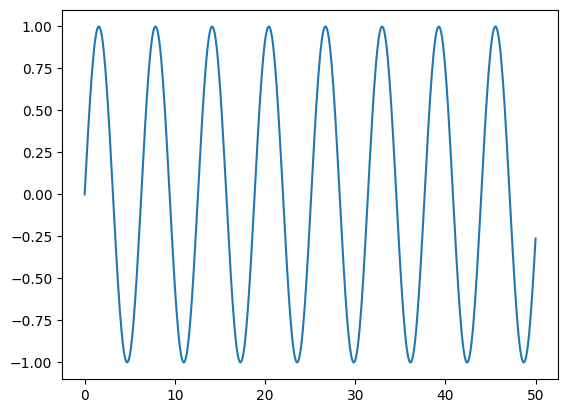

In [3]:
plt.plot(x, y)

In [4]:
df = pd.DataFrame(data=y, index=x, columns=['Sine']) # create a dataframe with the data
print(df)

          Sine
0.0   0.000000
0.1   0.099833
0.2   0.198669
0.3   0.295520
0.4   0.389418
...        ...
49.6 -0.617439
49.7 -0.535823
49.8 -0.448854
49.9 -0.357400
50.0 -0.262375

[501 rows x 1 columns]


In [5]:
test_percent = 0.1
test_point = np.round(len(df) * test_percent)

In [6]:
test_ind = int(len(df) - test_point)

In [7]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(train)
scaled_train = scaler.transform(train)

In [11]:
scaled_test = scaler.transform(test)


In [12]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
lenght = 25 # how long of a sequence to create
batch_size = 1 # how many batches of the data we are passing

generator = TimeseriesGenerator(scaled_train, scaled_train, length=lenght, batch_size=batch_size) # create a generator 

In [14]:
X, y = generator[0] # get the first batch

<Axes: >

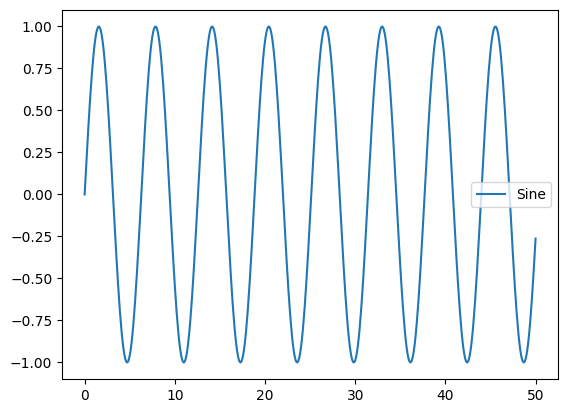

In [15]:
df.plot() # plot the data